In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
Cm = 1
g_Na, g_K, g_L, g_A = 120, 20, 0.3, 47.7
E_Na, E_K, E_L, E_A = 55, -72, -17, -75

In [3]:
def alphan(V):
    if V==(-45.7):
        return 0.01/-0.1*np.exp(0.1*(V+45.7))
    else:
        return (0.01*(V+45.7)) / (1 - np.exp(-0.1*(V+45.7)))
def alpham(V):
    if V==(-29.7):
        return 0.1/-0.1*np.exp(0.1*(V+29.7))
    else:
        return (0.1*(V+29.7)) / (1 - np.exp(-0.1*(V+29.7)))
def alphah(V): return 0.07 * np.exp(-0.05*(V+48))

def betan(V): return 0.125 * np.exp(-0.0125*(V+55.7))
def betam(V): return 4 * np.exp(-0.0556*(V+54.7))
def betah(V): return 1 / (1 + np.exp(-0.1*(V+18)))

def tn(V): return 2 / (3.8*(alphan(V)+betan(V)))
def tm(V): return 1 / (3.8*(alpham(V)+betam(V)))
def th(V): return 1 / (3.8*(alphah(V)+betah(V)))
def ta(V): return 0.3632 + (1.158 / (1 + np.exp(0.0497*(V+55.96))))
def tb(V): return 1.24 + (2.678 / (1 + np.exp(0.0624*(V+50))))

def ni(V): return alphan(V) / (alphan(V) + betan(V))
def mi(V): return alpham(V) / (alpham(V) + betam(V))
def hi(V): return alphah(V) / (alphah(V) + betah(V))
def ai(V): return ((0.0761 * np.exp(0.0314*(V+94.22))) / (1+np.exp(0.0346*(V+1.17))))**(1/3)
def bi(V): return (1 / (1 + np.exp(0.0688*(V+53.3))))**4

In [4]:
t = np.arange(0, 200, 0.01) #intervalo de tempo

def J_inj(t):   #corrente injetada
    J = 10
    ti = 60
    tf = 200
    return J*(t>ti)-J*(t>tf)


def dALLdt(X,t):
    V, n, m, h, a, b = X
    dVdt = (J_inj(t) - g_Na * m**3 * h * (V-E_Na) - g_K * n**4 * (V - E_K) - g_L * (V-E_L) - g_A * a**3 * b * (V-E_A)) / Cm
    dndt = (ni(V) - n) / tn(V)
    dmdt = (mi(V) - m) / tm(V)
    dhdt = (hi(V) - h) / th(V)
    dadt = (ai(V) - a) / ta(V)
    dbdt = (bi(V) - b) / tb(V)

    return dVdt, dndt, dmdt, dhdt, dadt, dbdt

In [5]:
X = odeint(dALLdt, [-67.976, 0.1558, 0.01, 0.965, 0.5404, 0.2885], t)
V = X[:,0]
n = X[:,1]
m = X[:,2]
h = X[:,3]
a = X[:,4]
b = X[:,5]

In [6]:
freq = [0,0,0,1000/140,1000/140,2000/140,2000/140,3000/140,3000/140,4000/140,4000/140]
j = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6, 9.8, 10]

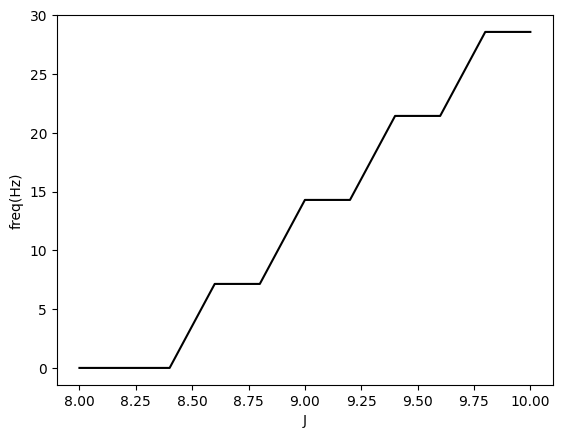

In [7]:
plt.plot(j, freq, 'k')
plt.ylabel('freq(Hz)')
plt.xlabel('J')

plt.show()